In [1]:
import requests

In [2]:
# Define the URL and output file name
url = "https://www2.census.gov/geo/docs/reference/cenpop2020/blkgrp/CenPop2020_Mean_BG06.txt"
output_file = "CenPop2020_Mean_BG06.txt"

In [3]:
# Send a request to download the file
response = requests.get(url)

In [4]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open(output_file, "wb") as file:
        file.write(response.content)
    print(f"File saved as {output_file}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File saved as CenPop2020_Mean_BG06.txt


In [5]:
import pandas as pd

In [10]:
import pandas as pd

# Define input and output file paths
input_file = "CenPop2020_Mean_BG06.txt"  
output_file = "CenPop2020_Mean_BG06.csv"

# Load the text file, using the first row as the header
df = pd.read_csv(input_file, sep=",", header=0, encoding="utf-8")

# Save as CSV
df.to_csv(output_file, index=False)

print(f"Converted {input_file} to {output_file} successfully!")

Converted CenPop2020_Mean_BG06.txt to CenPop2020_Mean_BG06.csv successfully!


In [20]:
df.columns
df.describe()
# Check the data type of the COUNTYFP column
print(df['COUNTYFP'].dtype)

int64


In [22]:
# Directly filter where COUNTYFP is 75 (as an integer)
filtered_df_SMC = df[df['COUNTYFP'] == 75]
filtered_df_SMC.head(10)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,POPULATION,LATITUDE,LONGITUDE
19723,6,75,10101,1,838,37.806470,-122.411618
19724,6,75,10101,2,1188,37.805256,-122.409315
19725,6,75,10102,1,2000,37.804714,-122.414025
19726,6,75,10201,1,1395,37.801791,-122.421771
19727,6,75,10201,2,1073,37.800306,-122.421519
19728,6,75,10202,1,1017,37.804905,-122.420166
19729,6,75,10202,2,1057,37.804307,-122.423391
19730,6,75,10300,1,1685,37.802812,-122.415833
19731,6,75,10300,2,1091,37.800983,-122.414462
19732,6,75,10300,3,1286,37.799587,-122.415211


In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

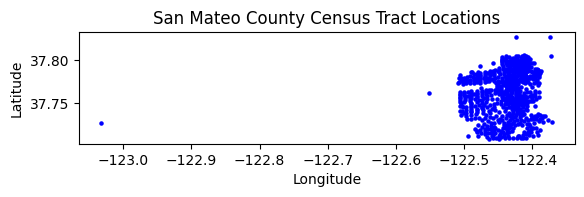

In [25]:
# Create a GeoDataFrame from the filtered_df_SMC
gdf_SMC = gpd.GeoDataFrame(filtered_df_SMC, geometry=gpd.points_from_xy(filtered_df_SMC['LONGITUDE'], filtered_df_SMC['LATITUDE']))

# Ensure the CRS is set to 'EPSG:4326' for latitude and longitude (WGS84)
gdf_SMC.set_crs('EPSG:4326', inplace=True)

# Plot the locations of the filtered centroids
gdf_SMC.plot(marker='o', color='blue', markersize=5)

# Title and axis labels
plt.title('San Mateo County Census Tract Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()